# HFSS to SBR+ time animation

This example shows how to use PyAEDT to create an SBR+ time animation
and save it to a GIF file. This example works only on CPython.

Keywords: **HFSS**, **SBR+**, **time domain**, **IFFT**.

## Perform imports and define constants

Perform required imports.

In [1]:
import os
import tempfile
import time

In [2]:
from ansys.aedt.core import Hfss, downloads

Define constants.

In [3]:
AEDT_VERSION = "2024.2"
NUM_CORES = 4
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [4]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Download project

In [5]:
project_file = downloads.download_sbr_time(destination=temp_folder.name)

## Launch HFSS and analyze

In [6]:
hfss = Hfss(
    project=project_file,
    version=AEDT_VERSION,
    non_graphical=NG_MODE,
    new_desktop=True,
)

PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmpvthg73yx.ansys\sbr\poc_scat_small.aedt.


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: PyAEDT version 0.12.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_34abab9f-5bfa-458e-aac6-2c3ca34dbc7f.log is enabled.


PyAEDT INFO: Log on AEDT is enabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 57510


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmpvthg73yx.ansys\sbr\poc_scat_small.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v242\Win64


PyAEDT INFO: Ansoft.ElectronicsDesktop.2024.2 version started with process ID 5836.


PyAEDT INFO: Project poc_scat_small has been opened.


PyAEDT INFO: Active Design set to HFSSDesign1


PyAEDT INFO: Aedt Objects correctly read


In [7]:
hfss.analyze(cores=NUM_CORES)

PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Solving all design setups.


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Design setup None solved correctly in 0.0h 0.0m 49.0s


True

## Get solution data

Get solution data. After the simulation is performed, you can load solutions
in the ``solution_data`` object.

In [8]:
solution_data = hfss.post.get_solution_data(
    expressions=["NearEX", "NearEY", "NearEZ"],
    variations={"_u": ["All"], "_v": ["All"], "Freq": ["All"]},
    context="Near_Field",
    report_category="Near Fields",
)

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Solution Data Correctly Loaded.


## Compute IFFT

Compute IFFT (Inverse Fast Fourier Transform).

In [9]:
t_matrix = solution_data.ifft("NearE", window=True)

## Export IFFT to CSV file

Export IFFT to a CSV file.

In [10]:
frames_list_file = solution_data.ifft_to_file(
    coord_system_center=[-0.15, 0, 0],
    db_val=True,
    csv_path=os.path.join(hfss.working_directory, "csv"),
)

## Plot scene

Plot the scene to create the time plot animation

C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


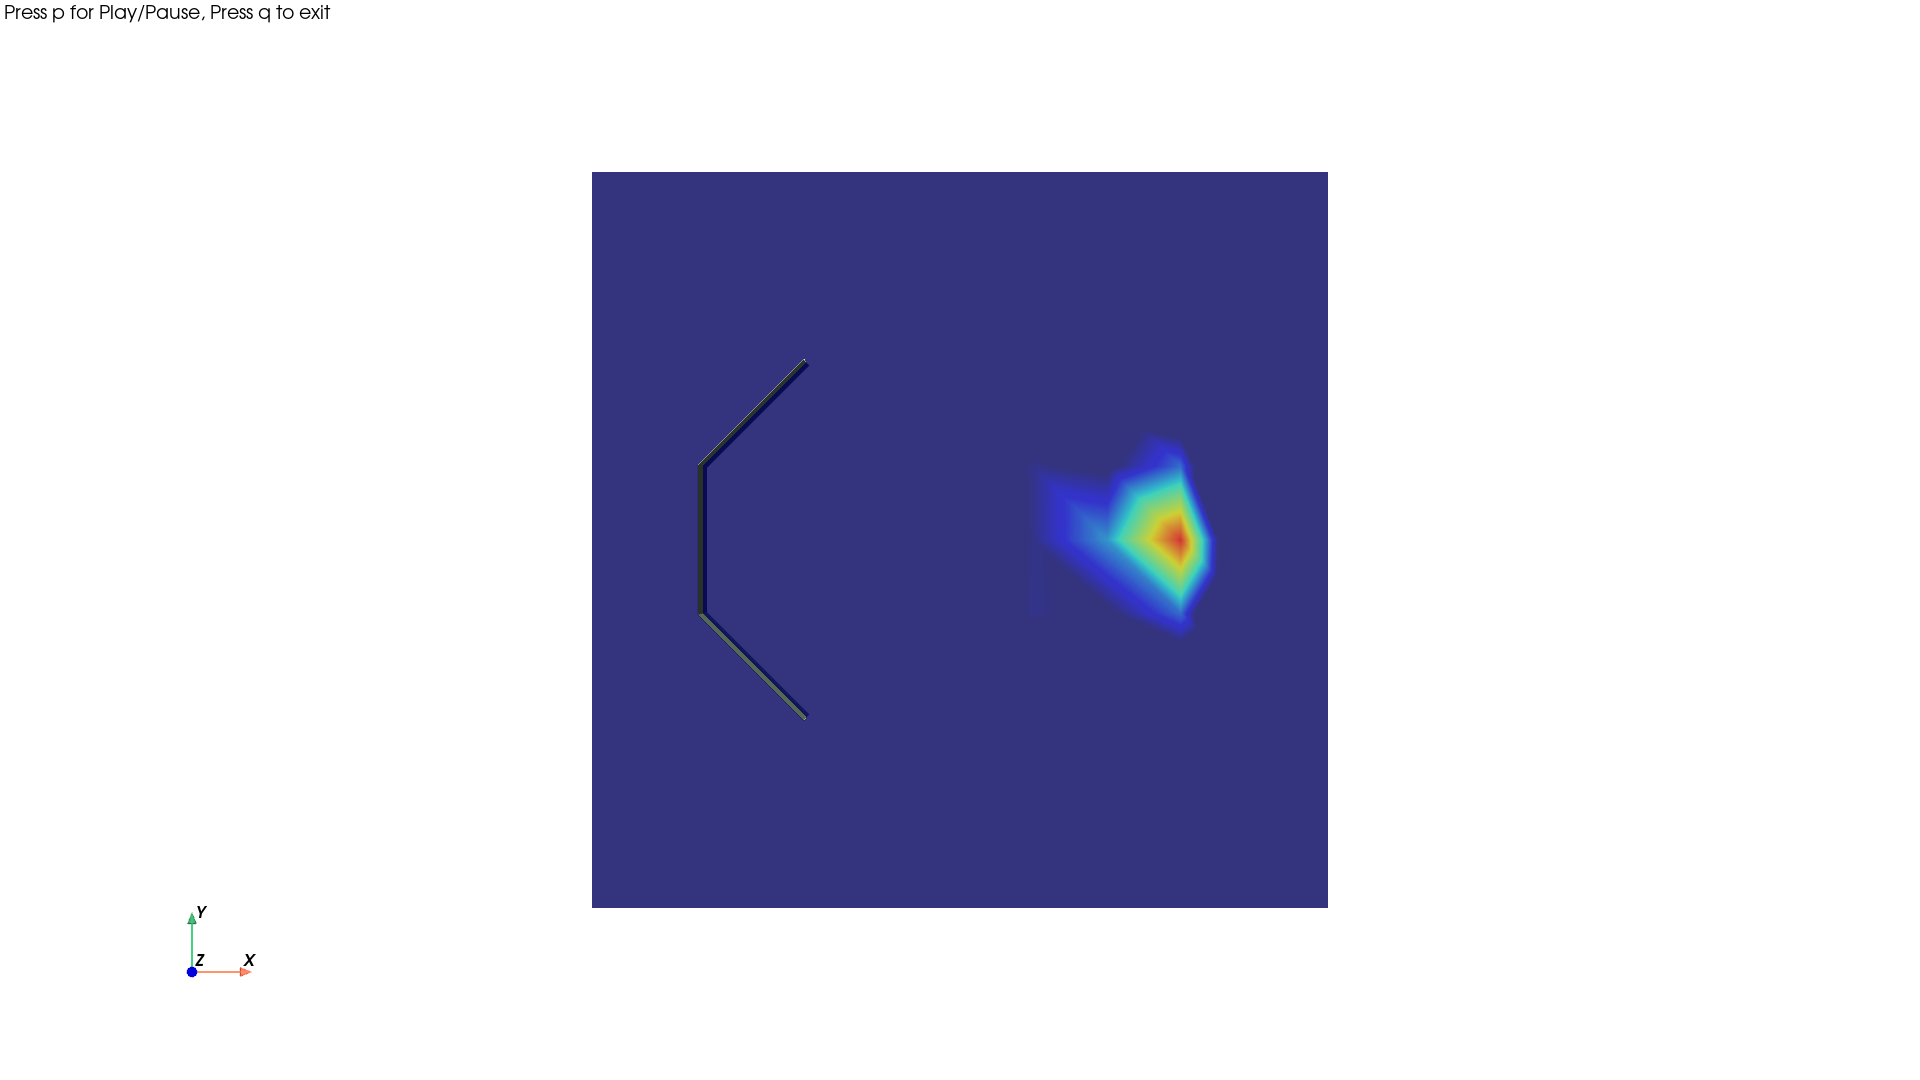

In [11]:
hfss.post.plot_scene(
    frames=frames_list_file,
    gif_path=os.path.join(hfss.working_directory, "animation.gif"),
    norm_index=15,
    dy_rng=35,
    show=False,
    view="xy",
    zoom=1,
)

## Release AEDT

Release AEDT and close the example.

In [12]:
hfss.save_project()
hfss.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project poc_scat_small Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``. If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell removes all temporary files, including the project folder.

In [13]:
temp_folder.cleanup()